# Memory Information

In [1]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")
# keras-team /
# keras-contrib 

======================================== Memory Information ========================================
Total: 25.51GB
Available: 24.59GB
Used: 624.52MB
Percentage: 3.6%


# GPU Information

In [2]:
! nvidia-smi

Fri Oct 30 05:54:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [27]:
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git
!pip install indic-nlp-library
import sys
from indicnlp import common

# The path to the local git repo for Indic NLP library
INDIC_NLP_LIB_HOME=r"indic_nlp_library"

# The path to the local git repo for Indic NLP Resources
INDIC_NLP_RESOURCES=r"indic_nlp_resources"

# Add library to Python path
sys.path.append(r'{}\src'.format(INDIC_NLP_LIB_HOME))

# Set environment variable for resources folder
common.set_resources_path(INDIC_NLP_RESOURCES)

Cloning into 'indic_nlp_resources'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 133 (delta 0), reused 2 (delta 0), pack-reused 126
Receiving objects: 100% (133/133), 149.77 MiB | 40.50 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [28]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from indicnlp.tokenize import sentence_tokenize, indic_tokenize

In [4]:
train_data = pd.read_csv('train.csv', header=0, index_col=0)

##**Label Frequency in Training Data**

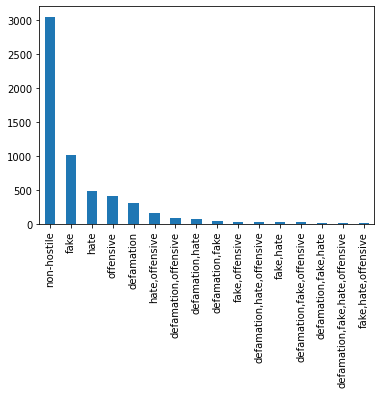

In [23]:
train_data['Labels Set'].value_counts().plot(kind = 'bar')

##**K Most Frequent Words in Every Class**

In [47]:
import string

hindi_stopwords = list(set(pd.read_csv('hindi_stopwords.csv', header=None)[0].tolist()))
# Creating Frequency Dictionary

def_dict = defaultdict(int)
hate_dict = defaultdict(int)
fake_dict = defaultdict(int)
nh_dict = defaultdict(int)
off_dict = defaultdict(int)

for index, row in train_data.iterrows():
  for word in indic_tokenize.trivial_tokenize(row['Filtered_Post'], lang='hi'):
    if word not in hindi_stopwords and word not in string.punctuation:
      for label in [x.strip() for x in row['Labels Set'].split(',')]:
        if label == 'defamation':
          def_dict[word] +=1

        if label == 'hate':
          hate_dict[word] +=1

        if label == 'fake':
          fake_dict[word] +=1

        if label == 'non-hostile':
          nh_dict[word] +=1

        if label == 'offensive':
          off_dict[word] +=1

K = 20
defamation = sorted(def_dict, key=def_dict.get, reverse=True)[:K]
hate = sorted(hate_dict, key=hate_dict.get, reverse=True)[:K]    
fake = sorted(fake_dict, key=fake_dict.get, reverse=True)[:K]    
nh = sorted(nh_dict, key=nh_dict.get, reverse=True)[:K]    
offensive = sorted(off_dict, key=off_dict.get, reverse=True)[:K]        

In [49]:
print("\n\nTop {} Most Frequent Words in Defamation".format(K))
for key in defamation:
    print(key, def_dict[key])

print("\n\nTop {} Most Frequent Words in Hate".format(K))
for key in hate:
    print(key, hate_dict[key])

print("\n\nTop {} Most Frequent Words in Fake".format(K))
for key in fake:
    print(key, fake_dict[key])


print("\n\nTop {} Most Frequent Words in Non Hostile".format(K))
for key in nh:
    print(key, nh_dict[key])

print("\n\nTop {} Most Frequent Words in Offensive".format(K))
for key in offensive:
    print(key, off_dict[key])





Top 20 Most Frequent Words in Defamation
क्या 89

 76
देश 67
जी 65
रही 65
मोदी 59
भारत 56
अब 51
सरकार 48
गई 45
नही 45
दे 42


 41
कांग्रेस 34
बीजेपी 33
मैं 32
कोरोना 32
सब 32
आज 31
चाहिए 31


Top 20 Most Frequent Words in Hate
देश 158
क्या 101

 94
नही 92
भारत 92
रही 89
जी 81
अब 80
सरकार 69
पाकिस्तान 62
हिन्दू 60


 58
साले 57
मोदी 57
गई 55
वो 54
लोग 51
कांग्रेस 47
बात 45
पुलिस 45


Top 20 Most Frequent Words in Fake


 316
भारत 150

 139
देश 128
रही 126
क्या 125
कोरोना 108
अब 104
सरकार 101
वीडियो 97
मोदी 95
पुलिस 84
जी 82
लोगों 79
गए 73
गई 73
हम 66
चीन 62
आज 62
लोग 58


Top 20 Most Frequent Words in Non Hostile

 1060


 775
भारत 340
जी 259
कोरोना 250
श्री 212
आज 208
अब 190
देश 189
प्रदेश 182
लोगों 180
पुलिस 178
दिल्ली 176
क्या 175
सरकार 174
चीन 163
सुशांत 142
रही 134
via 132
गई 130


Top 20 Most Frequent Words in Offensive
क्या 115

 110
देश 83
नही 81
साला 81
साले 71
अब 64
रही 60
तू 56
मोदी 55
लोग 54


 50
वो 50
भारत 49
कमीनी 49
जी 46
बात 43
सब 42
कुत्ते 41
चाहिए 40
